## CAR SALES EDA

In [1]:
#pip install missingno

In [2]:
# Import Libraries

import numpy as np                   # implement multi-dimensional arrays and matrices
import pandas as pd                  # for data manupulation and analysis
import matplotlib.pyplot as plt      # for data visualization
import seaborn as sns                # provide high_level of interface for drawing attractive and informative statistics
%matplotlib inline
import missingno as msno
sns.set()
from subprocess import check_output   # for viewing profile report
#import warnings   to remove all warnings
#warnings.filterwarnings("ignore")

In [3]:
# Load data and view top 5 

carsales = pd.read_excel(r"C:\Users\EZ FARMING\Desktop\Seun Personal Docs\DATA SCIENCE\PYTHON\EXPLORATIVE DATA ANALYSIS\SORAN AUTOMOBILE CASE STUDY\Car_Sales.xlsx")

carsales.head()

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   
2  Mercedes-Benz  35000.0      other      135   5.5  Petrol          yes   
3  Mercedes-Benz  17800.0        van      162   1.8  Diesel          yes   
4  Mercedes-Benz  33000.0      vagon       91   NaN   Other          yes   

   year    model  drive  
0  2010     Kuga   full  
1  2011  E-Class   rear  
2  2008   CL 550   rear  
3  2012    B 180  front  
4  2013  E-Class    NaN

#### Overview of dataset

In [4]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [5]:
# Dimensionality 
carsales.shape

(9576, 10)

In [6]:
# statistical summary of the dataset
carsales.describe().astype(int)

price  mileage  engV  year
count    9576     9576  9142  9576
mean    15633      138     2  2006
std     24106       98     5     7
min         0        0     0  1953
25%      4999       70     1  2004
50%      9200      128     2  2008
75%     16700      194     2  2012
max    547800      999    99  2016

In [7]:
#missing value count
carsales.isna().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64


##### Preprofiling

In [8]:
pip install -U pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [9]:
from pandas_profiling import ProfileReport

C:\Users\EZ FARMING\AppData\Local\Temp\ipykernel_15868\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [10]:
carsales_profile = ProfileReport(carsales, title='carsales_before_data_cleaning')
carsales_profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

##### Data Cleaning

In [11]:
# make a copy of df - .copy()
carsales1 = carsales.copy()
carsales1.head(2)

car    price       body  mileage  engV engType registration  \
0           Ford  15500.0  crossover       68   2.5     Gas          yes   
1  Mercedes-Benz  20500.0      sedan      173   1.8     Gas          yes   

   year    model drive  
0  2010     Kuga  full  
1  2011  E-Class  rear

##### Rename column names

In [12]:
carsales.columns

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [13]:
carsales.columns = ['car_band', 'price', 'body', 'mileage', 'engineValues', 'engineType', 'registration',
       'year', 'model', 'drive']
carsales.head(2)

car_band    price       body  mileage  engineValues engineType  \
0           Ford  15500.0  crossover       68           2.5        Gas   
1  Mercedes-Benz  20500.0      sedan      173           1.8        Gas   

  registration  year    model drive  
0          yes  2010     Kuga  full  
1          yes  2011  E-Class  rear

Handling Duplicates


In [14]:
carsales.duplicated().sum()


113

In [15]:
# drop duplicate rows
carsales.drop_duplicates(inplace=True)

In [16]:
carsales.shape

(9463, 10)

Handling missing values

In [17]:
# filling missing values for drive
# find the mode
carsales["drive"].mode()

0    front
Name: drive, dtype: object

In [18]:
#fill missing values with the mode "front"
carsales["drive"] =  carsales["drive"].fillna('front')

In [19]:
#fill missing values for engineValue with the median
carsales["engineValues"] = carsales.groupby(['car_band', 'body'])['engineValues'].transform(lambda x: x.fillna(x.median()))

In [20]:
#Let's see what we did
carsales.isna().sum()

car_band         0
price            0
body             0
mileage          0
engineValues    10
engineType       0
registration     0
year             0
model            0
drive            0
dtype: int64

In [21]:
#drop the remaining NaN values
carsales.dropna(subset=['engineValues'],inplace=True)
carsales.isnull().sum()

car_band        0
price           0
body            0
mileage         0
engineValues    0
engineType      0
registration    0
year            0
model           0
drive           0
dtype: int64

In [22]:
carsales.price[carsales.price==0].count()

238

In [23]:
# Dropping entries with price <= 0 

carsales = carsales.drop(carsales[carsales.price <=0].index)

In [24]:
carsales.price[carsales.price==0].count()

0

###### Post profiling

In [25]:
carsales_profile2 = ProfileReport(carsales, title='carsales_after_data_cleaning')
carsales_profile2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Questions:

* Which type of cars are sold maximum?
* What is the correlation between price and mileage?
* How many cars are registered?
* Does the registeration status influence car price?
* What is the car price distribution based on Engine Value?
* Which car type has the highest pricing?

### EDA

In [26]:
# 1. Which type of cars are sold most?

In [27]:
carsales['car_band'].value_counts().head(1)

Volkswagen    899
Name: car_band, dtype: int64

In [28]:
# 2. What is the correlation between price and mileage?

In [29]:
carsales['price'].corr(carsales['mileage'])

-0.3267339848197728

In [30]:
# 3. How many cars are registered?

In [31]:
len(carsales[carsales['registration'] == 'yes'])

8661

In [32]:
# 4. Does the registration status influence car price?.

<AxesSubplot:xlabel='registration', ylabel='price'>

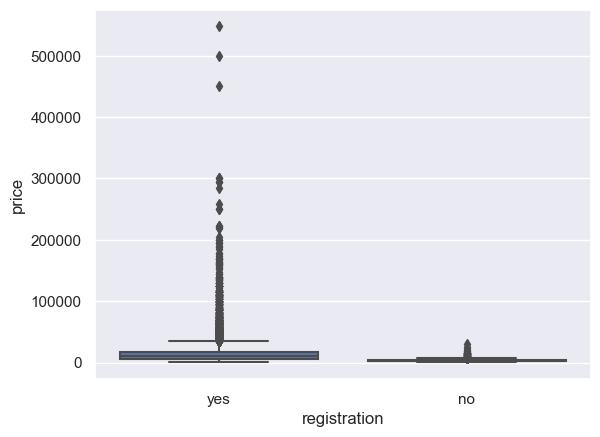

In [33]:
sns.boxplot(x="registration", y="price", data=carsales)

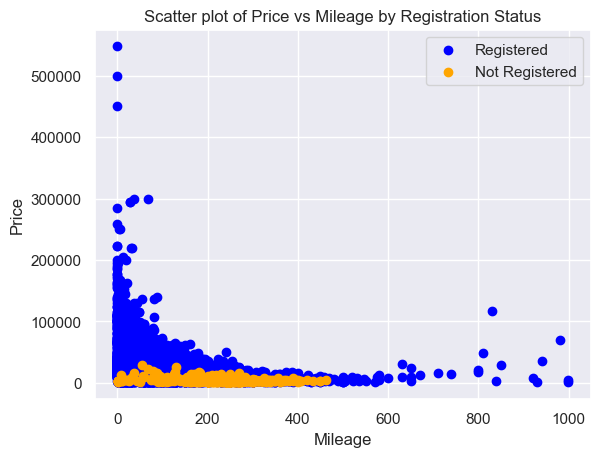

In [34]:
# separate data by registration status
registered = carsales[carsales['registration'] == 'yes']
not_registered = carsales[carsales['registration'] == 'no']

# plot scatter plot with different colors for each registration status
plt.scatter(registered['mileage'], registered['price'], color='blue', label='Registered')
plt.scatter(not_registered['mileage'], not_registered['price'], color='orange', label='Not Registered')

# set x and y labels
plt.xlabel('Mileage')
plt.ylabel('Price')

# set title and legend
plt.title('Scatter plot of Price vs Mileage by Registration Status')
plt.legend()

# display plot
plt.show()

In [35]:
# 5. What is the car price distribution based on Engine Value?

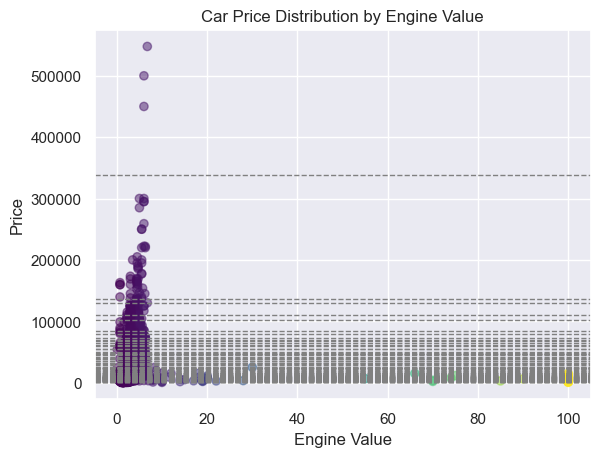

In [36]:
# Group the data by Engine Value and calculate the mean price
engine_groups = carsales.groupby('engineValues')['price'].mean()

# Create a scatter plot with Engine Value on x-axis and Price on y-axis
plt.scatter(x=carsales['engineValues'], y=carsales['price'], c=carsales['engineValues'], cmap='viridis', alpha=0.5)

# Add a horizontal line for the mean price of each Engine Value group
for engine_value, mean_price in engine_groups.iteritems():
    plt.axhline(mean_price, color='gray', linestyle='dashed', linewidth=1)

# Set the axis labels and title
plt.xlabel('Engine Value')
plt.ylabel('Price')
plt.title('Car Price Distribution by Engine Value')

plt.show()


In [37]:
engine_price_dist = carsales.groupby('engineValues')['price'].describe()
engine_price_dist

count          mean          std      min      25%      50%  \
engineValues                                                                
0.10            1.0  54000.000000          NaN  54000.0  54000.0  54000.0   
0.11            2.0  16700.000000  1414.213562  15700.0  16200.0  16700.0   
0.14            1.0  24300.000000          NaN  24300.0  24300.0  24300.0   
0.60           17.0   3870.529412   692.821957   2300.0   3450.0   3999.0   
0.65            1.0  38888.000000          NaN  38888.0  38888.0  38888.0   
...             ...           ...          ...      ...      ...      ...   
74.00           1.0   7500.000000          NaN   7500.0   7500.0   7500.0   
75.00           1.0  11350.000000          NaN  11350.0  11350.0  11350.0   
85.00           1.0   2800.000000          NaN   2800.0   2800.0   2800.0   
90.00           1.0   6100.000000          NaN   6100.0   6100.0   6100.0   
99.99          27.0   5546.866319  3987.433118    550.0   2700.0   4600.0   

                  75%         max  
engineValues                       
0.10          54000.0  54000.0000  
0.11          17200.0  17700.0000  
0.14          24300.0  24300.0000  
0.60           4200.0   5500.0000  
0.65          38888.0  38888.0000  
...               ...         ...  
74.00          7500.0   7500.0000  
75.00         11350.0  11350.0000  
85.00          2800.0   2800.0000  
90.00          6100.0   6100.0000  
99.99          7850.0  15195.3906  

[119 rows x 8 columns]

In [38]:
carsales.columns

Index(['car_band', 'price', 'body', 'mileage', 'engineValues', 'engineType',
       'registration', 'year', 'model', 'drive'],
      dtype='object')

In [39]:
# 6. Which car type has the highest pricing?

In [40]:
# Assuming the car sales data is stored in a DataFrame called 'carsales'
car_type_prices = carsales.groupby('body')['price'].mean().sort_values(ascending=False)
highest_priced_car_type = car_type_prices.index[0]

print(f"The car type with the highest pricing is {highest_priced_car_type}")

The car type with the highest pricing is crossover
